In [5]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD, NCG, LBFGS
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
    model.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

    model.set_optimizer(optimizer)

    model.fit(X_train,
            Y_train, 
            epochs=1000, 
            verbose=verbose)

    return model

# MONK 1

In [27]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")

seed = 56#108
results = []

Load Monk DataSet


In [30]:
#############################
#     NCG f1 - no restart
#############################
restart = None
optimizer = NCG(beta_method="fr", c1=1e-4, c2=.8, restart=restart, ln_maxiter = 100, tol = 1e-17)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_fr_no_restart = model.history
results.append(h_fr_no_restart["loss_mse"][-1]) 

 - loss_val: 0

Beta: 0.9999958289010191 -> compute alpha: Alpha: 2.0005366380713596 - norm_g: 4.7962013677672e-10
Epoch: 887 - time: 0.0070 - loss_train: 0.15322580645335296 - loss_val: 0

Beta: 0.9999958203716676 -> compute alpha: Alpha: 4.001073276142719 - norm_g: 4.796191344587164e-10
Epoch: 888 - time: 0.0070 - loss_train: 0.15322580645335293 - loss_val: 0

Beta: 0.9999916236817279 -> compute alpha: Alpha: 2.0005366380713596 - norm_g: 4.796171257332502e-10
Epoch: 889 - time: 0.0070 - loss_train: 0.15322580645335293 - loss_val: 0

Beta: 0.9999958033969247 -> compute alpha: Alpha: 2.0005366380713596 - norm_g: 4.796161193508419e-10
Epoch: 890 - time: 0.0060 - loss_train: 0.15322580645335293 - loss_val: 0

Beta: 0.9999957947972865 -> compute alpha: Alpha: 2.0005366380713596 - norm_g: 4.796151109082785e-10
Epoch: 891 - time: 0.0080 - loss_train: 0.15322580645335293 - loss_val: 0

Beta: 0.9999957863560192 -> compute alpha: Alpha: 2.0005366380713596 - norm_g: 4.796141004435514e-10
Epoch:

In [31]:
#############################
#     NCG f1 - 15 restart
#############################
restart = 15
optimizer = NCG(beta_method="fr", c1=1e-4, c2=.8, restart=restart, ln_maxiter = 100, tol = 1e-17)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_fr_r_15 = model.history
results.append(h_fr["loss_mse"]) 

: 0.011214800168019226 - norm_g: 1.371339684792621
Epoch: 184 - time: 0.0060 - loss_train: 0.04802891751529157 - loss_val: 0

Beta: 1.3760355643410285 -> compute alpha: Alpha: 0.012067247909405089 - norm_g: 1.6086437405773562
Epoch: 185 - time: 0.0050 - loss_train: 0.04759556350945314 - loss_val: 0

Beta: 1.5220700615718088 -> compute alpha: Alpha: 0.012201244372243392 - norm_g: 1.984619230471585
Epoch: 186 - time: 0.0060 - loss_train: 0.04694760713766707 - loss_val: 0

Beta: 1.6370516624021654 -> compute alpha: Alpha: 0.011268906465820188 - norm_g: 2.5392671120740657
Epoch: 187 - time: 0.0050 - loss_train: 0.04655972795256915 - loss_val: 0

Beta: 1.7139163476605486 -> compute alpha: Alpha: 0.0027477618347797185 - norm_g: 3.3243228780429153
Epoch: 188 - time: 0.0050 - loss_train: 0.04650993135431706 - loss_val: 0

Beta: 1.1813442272010617 -> compute alpha: Alpha: 0.009425045986790143 - norm_g: 3.6131952458487
Epoch: 189 - time: 0.0050 - loss_train: 0.04639068391688874 - loss_val: 0

Be

NameError: name 'h_fr' is not defined

In [ ]:
#############################
#     NCG f1 - 3 restart
#############################
restart = 3
optimizer = NCG(beta_method="fr", c1=1e-4, c2=.3, restart=restart, ln_maxiter = 100, tol = 1e-17)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_fr_r_3 = model.history
results.append(h_fr["loss_mse"]) 

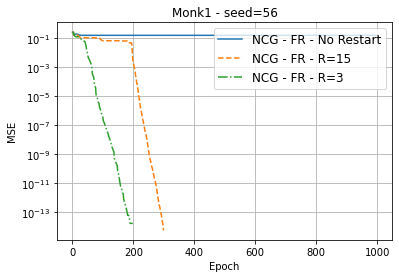

In [35]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_fr_no_restart["loss_mse"], linestyle='-')
plt.plot(h_fr_r_15["loss_mse"], linestyle = '--')
plt.plot(h_fr_r_3["loss_mse"], linestyle='-.')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Epoch')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - FR - No Restart','NCG - FR - R={}'.format(15),'NCG - FR - R={}'.format(3)], loc='upper right', fontsize='large')    
plt.show()


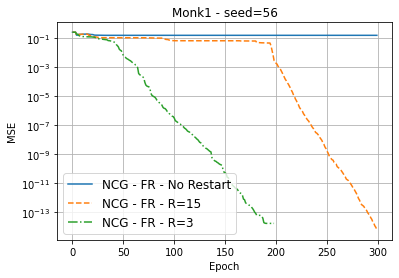

In [37]:
pos_train = (0,0)
figsize = (12, 4)
zoom = 300
plt.plot(h_fr_no_restart["loss_mse"][:zoom], linestyle='-')
plt.plot(h_fr_r_15["loss_mse"][:zoom], linestyle = '--')
plt.plot(h_fr_r_3["loss_mse"][:zoom], linestyle='-.')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - FR - No Restart','NCG - FR - R={}'.format(15),'NCG - FR - R={}'.format(3)], loc='down right', fontsize='large')    
plt.show()

In [10]:
#############################
#     NCG f1 - 3 restart
#############################
restart = 3
seed = 206
optimizer = NCG(beta_method="fr", c1=1e-4, c2=.9, restart=restart, ln_maxiter = 100, tol = 1e-17)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_fr_r_3 = model.history
results.append(h_fr_r_3["loss_mse"]) 

Build the model

Alpha: 0.0824501614813726 - norm_g: 0.0211999915986544
Epoch: 1 - time: 0.0030 - loss_train: 0.24999994411488569 - loss_val: 0

Beta: 0.16708242232764023 -> compute alpha: Alpha: 1.0 - norm_g: 0.008665648525836844
Epoch: 2 - time: 0.0030 - loss_train: 0.24999945024151565 - loss_val: 0

Beta: 14.50791172111258 -> compute alpha: Alpha: 87.3694498213177 - norm_g: 0.03300680766085845
Epoch: 3 - time: 0.0080 - loss_train: 0.15144784463525593 - loss_val: 0

Beta: 0 -> compute alpha: Alpha: 0.08849590375035885 - norm_g: 3.3174679891921506
Epoch: 4 - time: 0.0030 - loss_train: 0.14454454004957784 - loss_val: 0

Beta: 2.200596721551795 -> compute alpha: Alpha: 0.08993440191007193 - norm_g: 4.921267495832583
Epoch: 5 - time: 0.0030 - loss_train: 0.1315178556895022 - loss_val: 0

Beta: 0.226538140480583 -> compute alpha: Alpha: 0.03515862374651911 - norm_g: 2.3423276088922793
Epoch: 6 - time: 0.0030 - loss_train: 0.1301129463896159 - loss_val: 0

Beta: 0 -> compute alpha: Alpha: 

NameError: name 'h_fr' is not defined